In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from asteria.simulation import Simulation
from scan import *
from plthelper import *
import astropy.units as u

import matplotlib.pyplot as plt
import pickle

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [2]:
def reshape_data(item, filename):

        data = {"ic86": [], "gen2": [], "wls": []}

        for det in ["ic86", "gen2", "wls"]:
            dd = []
            for s in np.arange(len(sigma)):
                for a in np.arange(len(ampl_range)):
                    for f in np.arange(len(freq_range)):
                        if item[a][f] != {}:
                            for q in np.arange(len(quantiles)):
                                d = item[a][f][det][s][q].value
                                dd.append(d)
                        else:
                            # Handle the case where the key is not found
                            dd.append(0)
            data[det] = np.array(dd, dtype=float).reshape(len(sigma),
                                                          len(ampl_range), 
                                                          len(freq_range),
                                                          len(quantiles))
        np.savez(file = filename, 
                 ampl = ampl_range, 
                 freq = freq_range, 
                 sig = sigma, 
                 quan = quantiles,
                 ic86 = data["ic86"],
                 gen2 = data["gen2"],
                 wls = data["wls"])

        return data

In [3]:
file1 = open("./files/scan/part1.pkl", "rb")
data1 = pickle.load(file1)
file1.close()

In [4]:
ampl_range = np.arange(10,85,5)*1/100
freq_range = np.arange(80,410,10) * u.Hz
sigma = [3,5]
quantiles = [0.5, 0.16, 0.84]

In [5]:
redata1 = reshape_data(data1, "./files/scan/part1.npz")

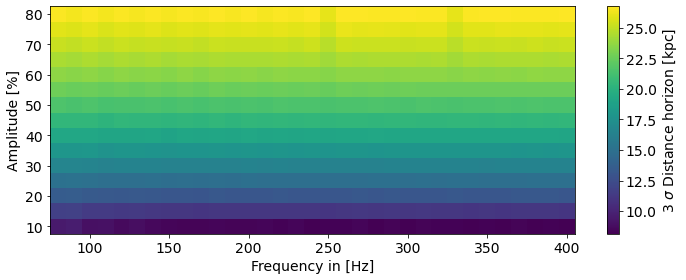

In [6]:
det = "ic86"
plot_para_scan(freq_range, ampl_range, redata1[det][0,:,:,0])

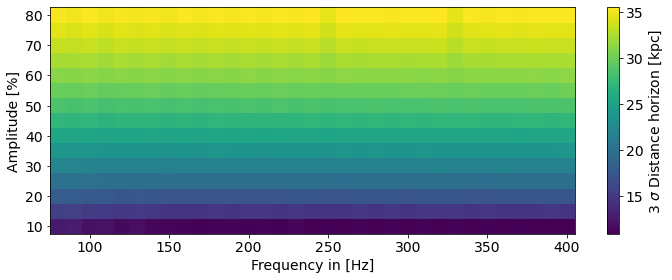

In [7]:
det = "gen2"
plot_para_scan(freq_range, ampl_range, redata1[det][0,:,:,0])

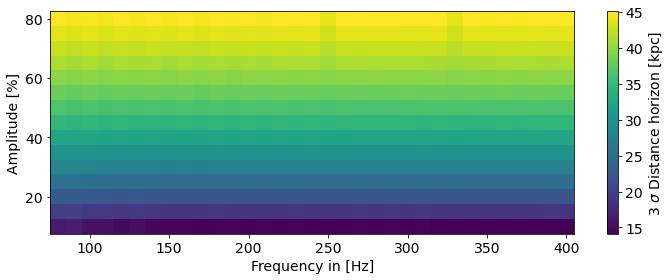

In [8]:
det = "wls"
plot_para_scan(freq_range, ampl_range, redata1[det][0,:,:,0])